In [2]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/berkeley.csv')

# Problem 1 
Problem 1. Task: Exploring Simpson's Paradox with Berkeley Admissions Data Background: In 1973, UC Berkeley's graduate admissions data revealed a surprising statistical pattern. Your job is to investigate whether there was gender discrimination in the admissions process. The dataset berkeley.csv contains admission decisions (Admitted/Rejected) for male and female applicants to six graduate departments (A-F) at UC Berkeley in Fall 1973.

Overall admission rates:
Sex
F    0.345753
M    0.442786
Name: Admission, dtype: float64


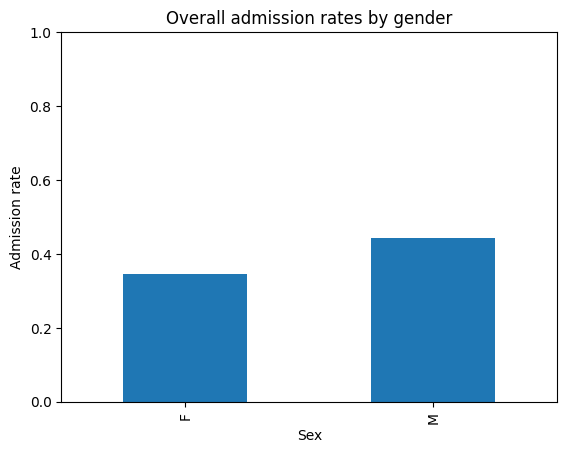

In [ ]:
# Task 1: Overall admission rates: Calculate admission rates for males and females across all departments combined. Does there appear to be gender discrimination? Against whom?
overall = (
    df.groupby("Sex")["Admission"]
    .apply(lambda x: (x == "Accepted").mean())
)

print("Overall admission rates:")
print(overall)

overall.plot(kind="bar")
plt.ylabel("Admission rate")
plt.title("Overall admission rates by gender")
plt.ylim(0, 1)
plt.show()

We can see that the overall admission rate for Males is 10% higher with sufficient data to suggest that there is gender discrimination against females.


Major-level admission rates:
Sex           F         M
Major                    
A      0.824074  0.724956
B      0.680000  0.630357
C      0.338954  0.369231
D      0.349333  0.330935
E      0.239186  0.277487
F      0.073314  0.058981
Other  0.376911  0.409526

M higher: 3
F higher: 4


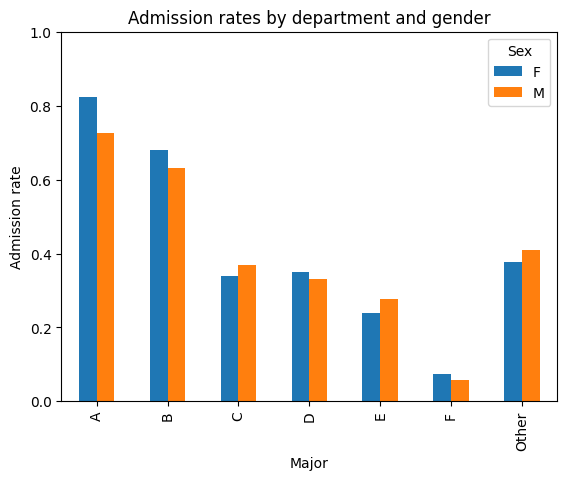

In [ ]:
# Task 2: Department-level rates: Calculate admission rates by gender for each department separately. In how many departments do males have higher rates? Females? Does this match part (1)? How do you explain any contradiction?
major_rates = (
    df.groupby(["Major", "Sex"])["Admission"]
    .apply(lambda x: (x == "Accepted").mean())
    .unstack()
)

print("\nMajor-level admission rates:")
print(major_rates)

print("\nM higher:", (major_rates["M"] > major_rates["F"]).sum())
print("F higher:", (major_rates["F"] > major_rates["M"]).sum())

major_rates.plot(kind="bar")
plt.ylabel("Admission rate")
plt.title("Admission rates by department and gender")
plt.ylim(0, 1)
plt.legend(title="Sex")
plt.show()

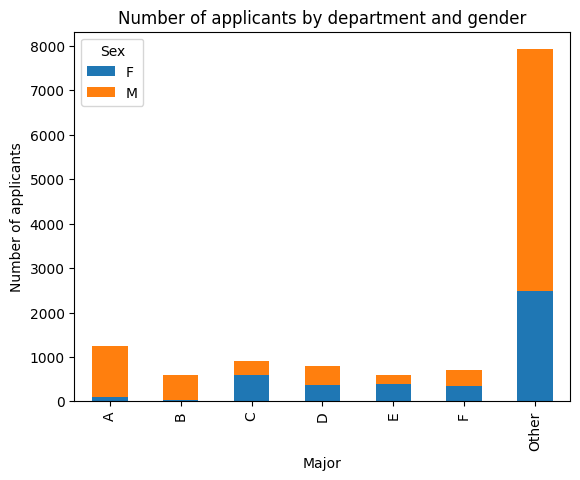

In [ ]:
# Task 3a: Applicant Counts
counts = df.groupby(["Major", "Sex"]).size().unstack()

counts.plot(kind="bar", stacked=True)
plt.ylabel("Number of applicants")
plt.title("Number of applicants by department and gender")
plt.show()

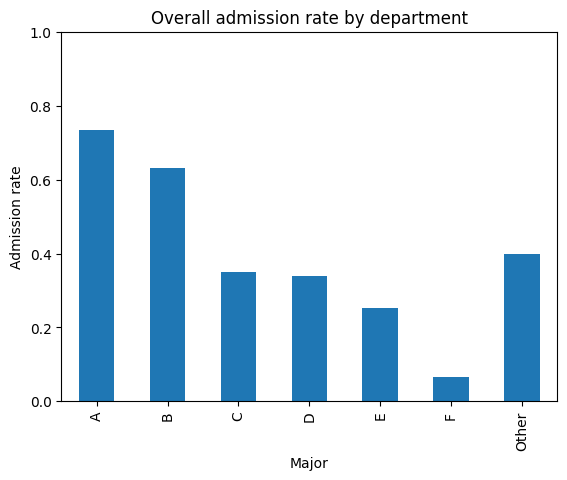

In [ ]:
# Task 3b: Department Selectivity
dept_selectivity = (
    df.groupby("Major")["Admission"]
    .apply(lambda x: (x == "Accepted").mean())
)

dept_selectivity.plot(kind="bar")
plt.ylabel("Admission rate")
plt.title("Overall admission rate by department")
plt.ylim(0, 1)
plt.show()

# Problem 2. Will Rogers Paradox

Mean score for all students =  73.833
Mean score for group A =  85.111
Mean score for group B =  62.556
Mean final score for group A =  87.571
Mean final score for group B =  65.091

Comparison of Initial and Final Mean Scores:
         Initial Mean  Final Mean
Overall        73.833      73.833
Group A        85.111      87.571
Group B        62.556      65.091

Students who changed groups:
   student_id  initial_score initial_group final_group
7           8             78             A           B
8           9             75             A           B

Did Group A average improve after reassignment? True
Did Group B average improve after reassignment? True
Did overall average improve after reassignment? False
Did any student's score change? False
Explanation: The reassignment of students between groups can lead to changes in group averages without affecting the overall average. This is because the overall average is a weighted average of the group averages, and the redistribution of s

/var/folders/cb/_vkbs15j09d73dptlvj8gn5m0000gn/T/ipykernel_78051/45130041.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='initial_group', y='initial_score', data=df, palette='Set2')


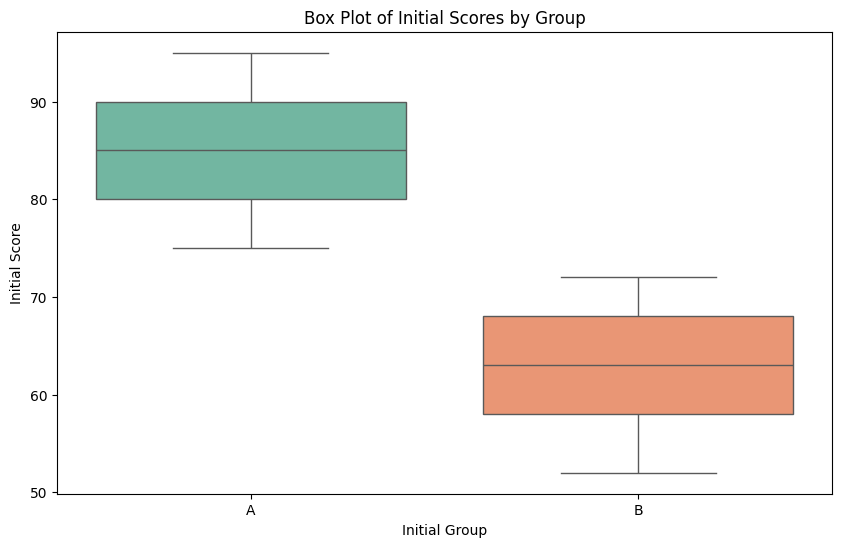

/var/folders/cb/_vkbs15j09d73dptlvj8gn5m0000gn/T/ipykernel_78051/45130041.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='final_group', y='initial_score', data=df, palette='Set3')


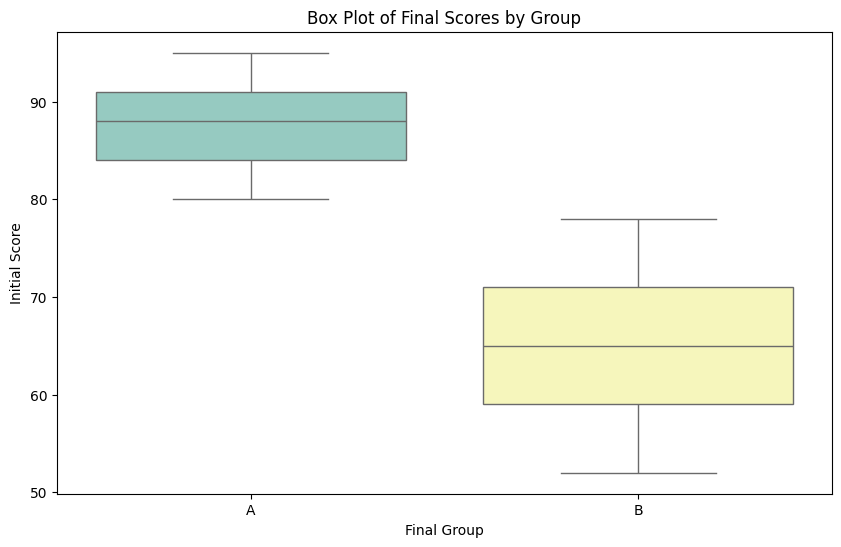

In [13]:
df = pd.read_csv('data/will_rogers_paradox.csv')

# Task 1. Calculate Initial Statistics 
print('Mean score for all students = ', df['initial_score'].mean().round(3))
print('Mean score for group A = ', df.loc[df['initial_group'] == 'A', 'initial_score'].mean().round(3))
print('Mean score for group B = ', df.loc[df['initial_group'] == 'B', 'initial_score'].mean().round(3))


# Task 2. Calculate Final Statistics
print('Mean final score for group A = ', df.loc[df['final_group'] == 'A', 'initial_score'].mean().round(3))
print('Mean final score for group B = ', df.loc[df['final_group'] == 'B', 'initial_score'].mean().round(3))

# Task 3. Comparison Table
comparison = pd.DataFrame({
    'Initial Mean': [
        df['initial_score'].mean().round(3),
        df.loc[df['initial_group'] == 'A', 'initial_score'].mean().round(3),
        df.loc[df['initial_group'] == 'B', 'initial_score'].mean().round(3)
    ],
    'Final Mean': [
        df['initial_score'].mean().round(3),
        df.loc[df['final_group'] == 'A', 'initial_score'].mean().round(3),
        df.loc[df['final_group'] == 'B', 'initial_score'].mean().round(3)
    ]
}, index=['Overall', 'Group A', 'Group B'])
print('\nComparison of Initial and Final Mean Scores:')
print(comparison)

# Task 4. Answer following Questions:
# Which students changed groups?
changed_groups = df[df['initial_group'] != df['final_group']]
print('\nStudents who changed groups:')
print(changed_groups)

# Did Group A average improve after the reassignment?
group_a_improved = df.loc[df['final_group'] == 'A', 'initial_score'].mean() > df.loc[df['initial_group'] == 'A', 'initial_score'].mean()
print('\nDid Group A average improve after reassignment?', group_a_improved)

# Did Group B average improve after the reassignment?
group_b_improved = df.loc[df['final_group'] == 'B', 'initial_score'].mean() > df.loc[df['initial_group'] == 'B', 'initial_score'].mean()
print('Did Group B average improve after reassignment?', group_b_improved)

# Did overall average improve after the reassignment?
overall_improved = df['initial_score'].mean() > df['initial_score'].mean()
print('Did overall average improve after reassignment?', overall_improved)

# Did anyone student's score change?
print('Did any student\'s score change?', False)

# How it is possible that both groups improved their average scores after reassignment, but the overall average did not change?
print('Explanation: The reassignment of students between groups can lead to changes in group averages without affecting the overall average. This is because the overall average is a weighted average of the group averages, and the redistribution of students can increase the average of both groups while keeping the overall average constant.')

# Task 5. Create Box plots for each group before and after reassignment
plt.figure(figsize=(10, 6))
sns.boxplot(x='initial_group', y='initial_score', data=df, palette='Set2')
plt.title('Box Plot of Initial Scores by Group')
plt.xlabel('Initial Group')
plt.ylabel('Initial Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='final_group', y='initial_score', data=df, palette='Set3')
plt.title('Box Plot of Final Scores by Group')
plt.xlabel('Final Group')
plt.ylabel('Initial Score')
plt.show()

# Problem 3. Linear Regression Problem

In [ ]:
# Task 1. How would you structure the experiment in order to estimate causal effect of the hours on exam_score?
# Step 1. Pick up sample of students and randomly assign them to different groups based on hours of study.
# Step 2. Ensure that the groups are similar in all other aspects (e.g., prior knowledge, demographics) to isolate the effect of study hours.
# Step 3. After a fixed period, administer the same exam to all students.
# Step 4. Collect exam scores and analyze the data using regression analysis, controlling for other variables if necessary, to estimate the causal effect of study hours on exam scores.

